<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [6]:
# change data from 2D to 3D
x_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [9]:
# set number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [13]:
# Build model using functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [15]:
# compile and fit
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5169 - accuracy: 0.8092 - val_loss: 0.3909 - val_accuracy: 0.8525
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3582 - accuracy: 0.8651 - val_loss: 0.3511 - val_accuracy: 0.8677
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3095 - accuracy: 0.8827 - val_loss: 0.3282 - val_accuracy: 0.8747
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2762 - accuracy: 0.8960 - val_loss: 0.3041 - val_accuracy: 0.8859
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2513 - accuracy: 0.9062 - val_loss: 0.2966 - val_accuracy: 0.8952
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2291 - accuracy: 0.9131 - val_loss: 0.3077 - val_accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2118 - accuracy: 0.9200 - val_loss: 0.3025 -

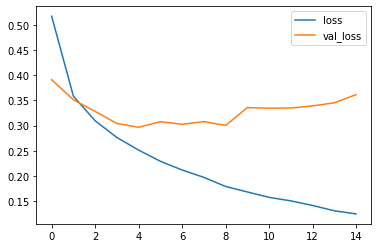

In [16]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

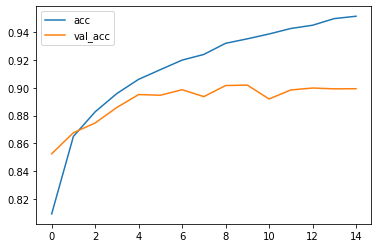

In [18]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion matrix, without normalization
[[835   2  16  25   4   1 111   0   6   0]
 [  3 974   2  16   2   0   1   0   2   0]
 [ 11   1 826  15  41   0 104   0   2   0]
 [  9   4  14 920  28   0  24   0   1   0]
 [  0   1  70  28 795   0 105   0   1   0]
 [  0   1   0   1   0 975   0  15   0   8]
 [ 81   0  47  30  64   0 770   0   8   0]
 [  0   0   0   0   0  12   0 967   0  21]
 [  3   0   5   1   4   2   7   3 975   0]
 [  1   0   0   0   0  10   0  32   0 957]]


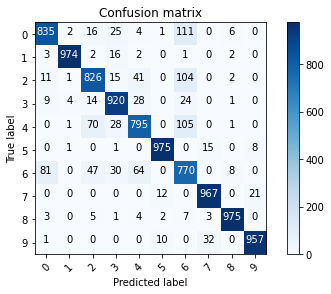

In [23]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [24]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

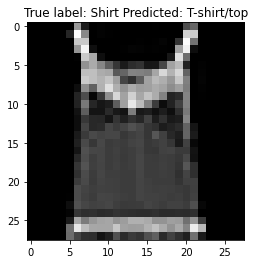

In [25]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));